In [ ]:
#library & package. 
#Jalankan ulang jika menambahkan library baru

import pandas as pd, numpy as np, matplotlib.pyplot as plt
import json, tweepy, requests, re
import text_prepocessing as tp
import seaborn as sns


In [ ]:
with open("token.json")as f:
  tokens = json.load(f)

bearer_token = tokens['bearer_token']
api_key = tokens['api_key']
api_key_secret = tokens['api_key_secret']
access_token = tokens['access_token']
access_token_secret = tokens['access_token_secret']

In [ ]:
#Apa kata kunci yang ingin kalian cari di twitter dan kenapa. 
#jelaskan singkat pada sel ini
'''
Di sini saya akan mencari kata kunci berupa 'pertamax'. Dimana akhir-akhir ini dikabarkan bahwa harga pertamax yang naik, menuai banyak komentar. Sehingga saya ingin melihat bagaimana respon sentimen dari masyarakat mengenai hal tersebut.
'''


"\nDi sini saya akan mencari kata kunci berupa 'pertamax'. Dimana akhir-akhir ini dikabarkan bahwa harga pertamax yang naik, menuai banyak komentar. Sehingga saya ingin melihat bagaimana respon sentimen dari masyarakat mengenai hal tersebut.\n"

In [ ]:
#ambil data pada twitter dengan kata kunci tersebut.
#ambil sebanyak 300 tweet
#masukkan pada datarame dan tampilkan dataframenya

api = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

query = "pertamax -is:retweet lang:id"

response = tweepy.Paginator(api.search_recent_tweets,
                            query=query,
                            max_results=100
                            ).flatten(limit=300)
tweets = [tweet.text.strip() for tweet in response]
df = pd.DataFrame(tweets, columns=["tweets"])
df.head()

,tweets
0,@joshushii ....naik terus deh kek Pertamax😥
1,user pertalite nunggu BLT pertamax https://t.c...
2,Baru sebulan gaji normal ga dikurang kurangin ...
3,Kenaikan harga Pertamax Rp12.500 per liter mer...
4,Kita semua sudah tahu ya kalau harga Pertamax ...


In [ ]:
#Lakukan Text Preprocessing (lakukan sebaik mungkin). Masukkan pada dataframe kalian dengan nama kolom tweet_clean.
#jangan lupa lakukan pembersihan slang word/bahasa gaul
#Tampilkan dataframe

tp.slangs = {
    'tp': 'tetapi',
    'msh': 'masih',
    'dpt': 'dapat',
    'rb': 'ribu',
    'jd': 'jadi',
    'bener': 'benar',
    'dimn': 'dimana',
    'blg': 'bilang',
    'ga': 'tidak',
    'gk': 'tidak',
    'gak': 'tidak',
    'dgn': 'dengan',
    'bwt': 'buat',
    'jg': 'juga',
    'klo': 'kalau',
    'sampe': 'sampai',
    'mengsedih': 'sedih',
    'yg': 'yang',
    'wajarpertamaxnaik': 'wajar pertamax naik',
    'ordebrutal': 'orde brutal',
    'pake': 'pakai',
    'aja': 'saja',
}

hasil = [tp.case_folding(item) for item in df['tweets']]

hasil = [' '.join(tp.remove_stopwords(item)) for item in hasil]

hasil = [tp.stemming_sentence(item) for item in hasil]

df['tweet_clean'] = hasil
df.head()


,tweets,tweet_clean
0,@joshushii ....naik terus deh kek Pertamax😥,deh kek pertamax
1,user pertalite nunggu BLT pertamax https://t.c...,user pertalite nunggu blt pertamax
2,Baru sebulan gaji normal ga dikurang kurangin ...,bulan tidakji normal kurang rangin troooss per...
3,Kenaikan harga Pertamax Rp12.500 per liter mer...,naik harga pertamax rp12 500 liter wajar harga...
4,Kita semua sudah tahu ya kalau harga Pertamax ...,harga pertamax sesuai rp 12 500 liter yuk sima...


Describe :        tweet_clean
count   300.000000
mean     91.830000
std      52.748356
min       8.000000
25%      50.000000
50%      82.000000
75%     125.000000
max     227.000000
Skewness : tweet_clean    0.682704
dtype: float64


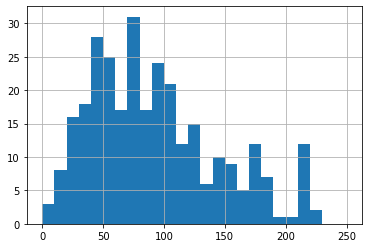

Describe :        tweet_clean
count   300.000000
mean     13.876667
std       7.711876
min       1.000000
25%       8.000000
50%      13.000000
75%      18.000000
max      35.000000
Skewness : tweet_clean    0.571429
dtype: float64


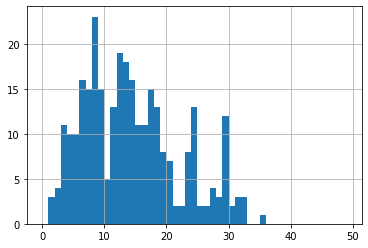

Describe :        tweet_clean
count   300.000000
mean      5.763867
std       0.988291
min       3.333333
25%       5.170977
50%       5.591667
75%       6.216270
max      11.250000
Skewness : tweet_clean    1.59403
dtype: float64


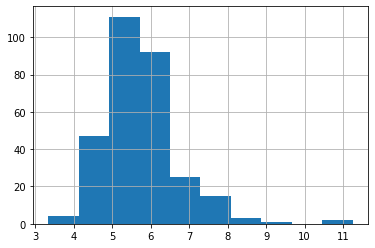

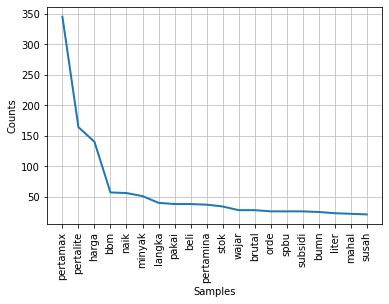

(harga, pertamax)        65
(naik, harga)            32
(pertamax, pertalite)    29
(orde, brutal)           26
(pakai, pertamax)        23
(pertamax, harga)        22
(pertalite, langka)      21
(minyak, goreng)         20
(beli, pertamax)         18
(wajar, pertamax)        18
dtype: int64


In [ ]:
#lakukan semua Text Analysis, seperti word_frequency, mean_word_length, dsb.
#tampilkan plot dari setiap analysis
#dengan melihat word_frequency coba perbaiki pembersihan slang word pada tweet_clean
#tampilkan dataframe kalian

tp.char_frequency(df, 'tweet_clean')
tp.word_length(df, 'tweet_clean')
tp.mean_word_length(df, 'tweet_clean')
tp.word_frequency(df, 'tweet_clean')
tp.bi_diagram(df, 'tweet_clean', 10)


In [ ]:
#Lakukan Sentiment Analysis 
#masukkan hasilnya pada dataframe dengan nama kolom "sentiment"

with open("./kata_positif.txt", "r") as positif_file:
    positive_words = list(set(positif_file.readlines()))
with open("./kata_negatif.txt", "r") as negative_file:
    negative_words = list(set(negative_file.readlines()))


In [ ]:
hasil = []
for tweet in df['tweet_clean']:
    tweet_clean = tweet.strip().split()

    good_count = 0  # nilai positif
    bad_count = 0  # nilai negatif

    for good_word in positive_words:
        count = tweet_clean.count(good_word.strip().lower())
        if count > 0:
            print(good_word.strip())
            good_count += count

    for bad_word in negative_words:
        count = tweet_clean.count(bad_word.strip().lower())
        if count > 0:
            print(bad_word.strip())
            bad_count += count

    print("positif: "+str(good_count))
    print("negatif: "+str(bad_count))
    hasil.append(good_count - bad_count)
    print("-----------------------------------------------------")


positif: 0
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
normal
positif: 1
negatif: 0
-----------------------------------------------------
wajar
naik
positif: 2
negatif: 0
-----------------------------------------------------
sesuai
positif: 1
negatif: 0
-----------------------------------------------------
ok
positif: 1
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
kompak
naik
tega
positif: 2
negatif: 1
-----------------------------------------------------
positif: 0
negatif: 0
-----------------------------------------------------
paksa
positif: 0
negatif: 1
-----------------------------------------------------
lolos
gagal
turun
positif: 2
negatif: 2
-----------------------------------------------------
izin
positif: 1
neg

In [ ]:
sentiments = ["positif" if sentimen > 0 else (
    "netral" if sentimen == 0 else "negatif") for sentimen in hasil]
df["sentiment"] = sentiments
df.head()


,tweets,tweet_clean,sentiment
0,@joshushii ....naik terus deh kek Pertamax😥,deh kek pertamax,netral
1,user pertalite nunggu BLT pertamax https://t.c...,user pertalite nunggu blt pertamax,netral
2,Baru sebulan gaji normal ga dikurang kurangin ...,bulan tidakji normal kurang rangin troooss per...,positif
3,Kenaikan harga Pertamax Rp12.500 per liter mer...,naik harga pertamax rp12 500 liter wajar harga...,positif
4,Kita semua sudah tahu ya kalau harga Pertamax ...,harga pertamax sesuai rp 12 500 liter yuk sima...,positif


In [ ]:
print(f'''
    Mean: {np.mean(hasil)}
    Median: {np.median(hasil)}
    quartil awal: {np.quantile(hasil,0.25)}
    quartil akhir: {np.quantile(hasil,0.75)}
    Standar deviasi: {np.std(hasil)}     
''')



    Mean: 0.21666666666666667
    Median: 0.0
    quartil awal: -1.0
    quartil akhir: 1.0
    Standar deviasi: 1.3963245404354327     



In [ ]:
unique, counts = np.unique(np.array(hasil), return_counts=True)
result = dict(zip(unique, counts))

labels = np.arange(-3, 4)
counts = list(map(lambda x: result.get(x) if result.get(x) else 0, labels))


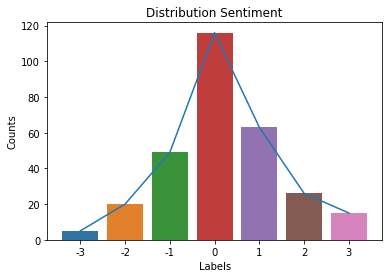

In [ ]:
fig, ax = plt.subplots()
ax.set_xticks(ax.get_xticks())

sns.barplot(x=list(labels),
            y=list(counts))

sns.lineplot(x=ax.get_xticks(),
             y=list(counts))

plt.title(f'Distribution Sentiment')
plt.xlabel('Labels')
plt.ylabel('Counts')

plt.show()


<AxesSubplot:xlabel='sentiment'>

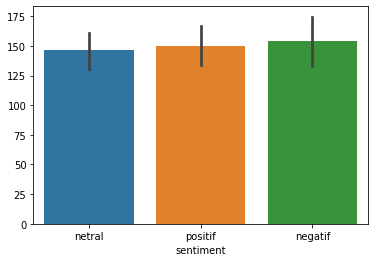

In [ ]:
sns.barplot(x=df['sentiment'],y=df['sentiment'].index)

In [ ]:
#lakukan analisis dan tarik kesimpulan dari Text analysis dan Sentiment Analysis
#masukkan analisis kalian pada sel berikut.

# Text Analysis
'''
- Dari data distribusi frekuensi jumlah karakter per data, terlihat distribusi terbanyak berada pada 40-60, 80, dan 100-110 karakter per tweet, dengan tweet yang memiliki panjang di atas 100 karakter tidak lebih dari 10 tweet.
- Dari data distribusi frekuensi jumlah kata per data, terlihat bahwa distribusi terbanyak berada pada 9 dan 13-15 kata per tweet, serta jumlah tweet di bawah 9 kata dan di atas 15 kata, memiliki jumlah yang lumayan banyak.
- Dari data distribusi frekuensi panjang kata rata-rata, terlihat distribusi terbanyak berada pada 5-7 karakter per kata per tweet.
- Jika digabungkan dengan hasil sebelumnya, diketahui mayoritas tweet berada pada 9 dan 13-15 kata, dengan setiap kata berada di antara 5-7 karakter dan total 40-60, 80, dan 100-110 karakter.
- Dari data distribusi frekuensi data, terlihat bahwa kata 'pertamax' adalah kata kunci pada pencarian ini. "Pertalite", "harga", "bbm", dan "naik" menjadi kata teratas selanjutnya yang sering keluar.Sehingga dapat disimpulkan bahwa keseluruhan tweet adalah tentang Harga BBM Pertamax dan Pertalite yang Naik.
- Dari hasil bi-gram, mendapatkan gambaran yang lebih jelas dimana menunjukkan bahwa keseluruhan tweet adalah membahas tentang Harga BBM Pertamax dan Pertalite serta Minyak Goreng yang Naik dan Langka.
'''

# Sentiment Analysis
'''
Hasil dari statistika deskriptif menunjukkan bahwa data sentimen untuk topik "Pertamax" merupakan right skewed distribution, dimana nilai dari mean lebih besar dari median. Dari distribusi plot secara kategorikal, terlihat bahwa tweet negatif sedikit lebih mendominasi, dan memiliki selisih yang tidak signifikan dengan tweet positif dan netral.
'''

'\nHasil dari statistika deskriptif menunjukkan bahwa data sentimen untuk topik "Pertamax" merupakan right skewed distribution, dimana nilai dari mean lebih besar dari median. Dari distribusi plot secara kategorikal, terlihat bahwa tweet negatif sedikit lebih mendominasi, dan memiliki selisih yang tidak signifikan dengan tweet positif dan netral.\n'